In [4]:
 # Description of the Data
#"This dataset contains the following data:

#Timestamp

#Age

#Gender

#Country

#state: If you live in the United States, which state or territory do you live in?

#self_employed: Are you self-employed?

#family_history: Do you have a family history of mental illness?

#treatment: Have you sought treatment for a mental health condition?

#work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

#no_employees: How many employees does your company or organization have?

#remote_work: Do you work remotely (outside of an office) at least 50% of the time?

#tech_company: Is your employer primarily a tech company/organization?

#benefits: Does your employer provide mental health benefits?

#care_options: Do you know the options for mental health care your employer provides?

#wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

#seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

#anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

#leave: How easy is it for you to take medical leave for a mental health condition?

#mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

#phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

#coworkers: Would you be willing to discuss a mental health issue with your coworkers?

#supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

#mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

#phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

#mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

#obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

#comments: Or other opinion





In [5]:
#Import data and preview dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("survey.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
#drop 03 columns 
df.drop(columns=['Timestamp', 'state', 'comments'], inplace = True)

In [9]:
#Categorize into "Male" and "Female"

In [10]:
df['Gender'].replace(['Male', 'Male ', 'male', 'M', 'm', 'Cis Male', 'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'], 'Male', inplace=True)

In [11]:
df['Gender'].replace(['Female', 'Female ', 'female', 'F', 'f', 'Woman', 'femail', 'Cis Female', 'cis-female/femme', 'Femake',
                     'Female(cis)', 'woman'], 'Female', inplace=True)

In [12]:
#View the changes
df['Gender'].value_counts()

Male                                              991
Female                                            246
Female (trans)                                      2
Agender                                             1
p                                                   1
A little about you                                  1
Female (cis)                                        1
queer                                               1
Neuter                                              1
Trans woman                                         1
male leaning androgynous                            1
Guy (-ish) ^_^                                      1
Androgyne                                           1
Genderqueer                                         1
fluid                                               1
Enby                                                1
All                                                 1
Nah                                                 1
non-binary                  

In [13]:
# Categorize every other gender under 'Others'.
df['Gender'].replace(['Trans-female', 'something kinda male?', 'queer/she/they',
 'non-binary', 'Nah', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender',
 'Guy (-ish) ^_^', 'male leaning androgynous', 'Trans woman', 'Neuter',
 'Female (trans)', 'queer', 'Female (cis)', 'ostensibly male, unsure what that really means'], 'Others', inplace=True)

In [14]:
#View the changes
df['Gender'].value_counts()

Male                  991
Female                246
Others                 19
All                     1
A little about you      1
p                       1
Name: Gender, dtype: int64

In [15]:
#Drop other undefined values
df.drop(df[df['Gender'].isin(['All', 'A little about you', 'p'])].index, inplace=True)

In [16]:
#View the changes
df['Gender'].value_counts()

Male      991
Female    246
Others     19
Name: Gender, dtype: int64

In [16]:
#Check the values in 'Age'

In [17]:
df['Age'].unique()

array([   37,    44,    32,    31,    33,    35,    39,    42,    23,
          29,    36,    27,    46,    41,    34,    30,    40,    38,
          50,    24,    18,    28,    26,    22,    19,    25,    45,
          21,   -29,    43,    56,    60,    54,   329,    55,    48,
          20,    57,    58,    47,    62,    51,    65,    49, -1726,
           5,    53,    61,    11,    72])

In [18]:
#Drop the values which > 65 and < 18

In [19]:
df.drop(df[df['Age'] < 18].index, inplace = True)

In [20]:
df.drop(df[df['Age'] > 100].index, inplace = True)

In [21]:
#View the changes
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [22]:
#Check for empty values

In [23]:
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               262
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [24]:
#With category 'self_employed'. Fill in the Null values with the most frequent response. 

In [25]:
df['self_employed'].fillna('No', inplace=True)

In [26]:
#Total: 1251 responses left.
#The columns with the most non-responses are "work_interfere" (with 262 non-responses). 
#In the case of "work_interfere", I have to throw out the column, imputing the values would be to detrimental as we are missing around 25% of the data. 

In [27]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [28]:
df.dropna(subset=['work_interfere'], inplace=True)

In [29]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [30]:
#After preprocessing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        989 non-null    int64 
 1   Gender                     989 non-null    object
 2   Country                    989 non-null    object
 3   self_employed              989 non-null    object
 4   family_history             989 non-null    object
 5   treatment                  989 non-null    object
 6   work_interfere             989 non-null    object
 7   no_employees               989 non-null    object
 8   remote_work                989 non-null    object
 9   tech_company               989 non-null    object
 10  benefits                   989 non-null    object
 11  care_options               989 non-null    object
 12  wellness_program           989 non-null    object
 13  seek_help                  989 non-null    object
 14  anonymity

In [31]:
#EDA 

Text(0, 0.5, 'Number of respondents')

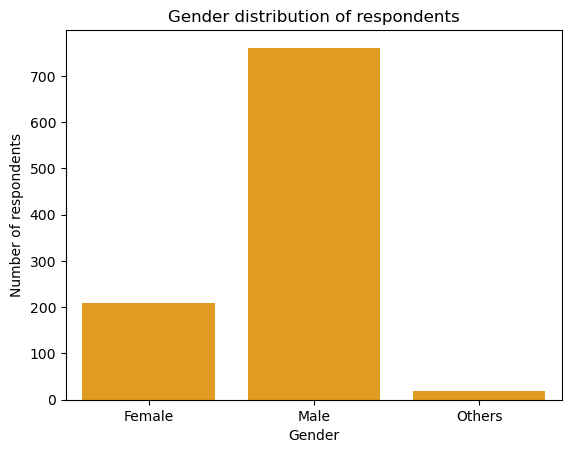

In [41]:
sns.countplot(x='Gender', data = df, color='orange')
plt.title('Gender distribution of respondents');
plt.ylabel('Number of respondents')


In [54]:
df['age_group'] = pd.cut(df['Age'], [18, 24, 30, 36, 42, 48, 54, 60, 65], labels = ["18-24", "24-30", "30-36", "36-42", "42-48", "48-54", "54-60", ">60"], 
                         include_lowest=True)

In [55]:
df['age_group'].value_counts()

24-30    326
30-36    301
36-42    156
18-24    118
42-48     57
48-54     16
54-60     12
>60        2
Name: age_group, dtype: int64

Text(0.5, 0, 'Age of respondents')

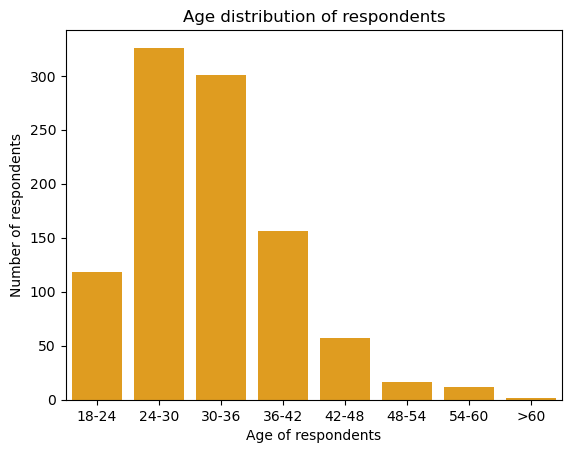

In [58]:
sns.countplot(x='age_group', data = df, color='Orange')
plt.title('Age distribution of respondents');
plt.ylabel('Number of respondents')
plt.xlabel('Age of respondents')





Text(0.5, 1.0, 'Have you sought treatment for a mental health condition?')

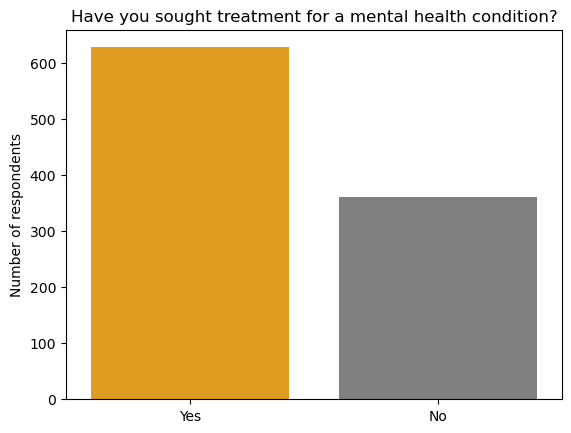

In [73]:
sns.countplot(x='treatment',data=df,palette =['orange','gray'])
plt.ylabel('Number of respondents')
plt.xlabel('')
plt.title('Have you sought treatment for a mental health condition?')



Text(0.5, 1.0, 'Do you have family history of mental illness?')

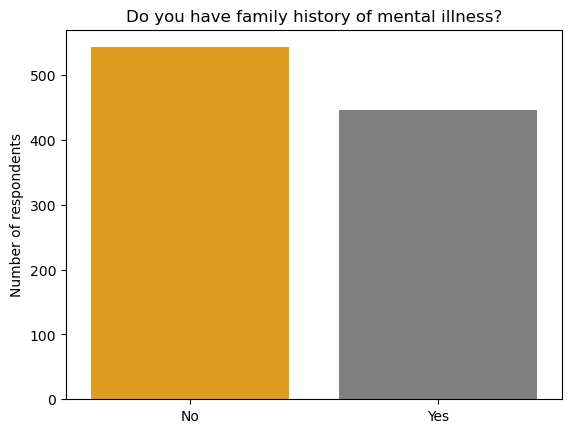

In [72]:
sns.countplot(x='family_history',data=df,palette =['orange','gray'])
plt.ylabel('Number of respondents')
plt.xlabel('')
plt.title('Do you have family history of mental illness?')



Text(0.5, 1.0, 'Relationship between family history and treatment')

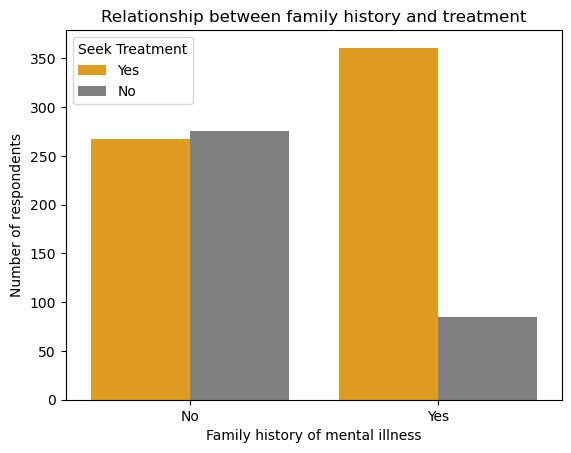

In [66]:
sns.countplot(x='family_history', data = df, hue ='treatment', palette =['orange','gray'])
leg = plt.legend(loc='best', title='Seek Treatment')
leg._legend_box.align = "left"
plt.ylabel('Number of respondents')
plt.xlabel('Family history of mental illness')
plt.title('Relationship between family history and treatment')





Text(0.5, 1.0, 'Relationship between age and treatment')

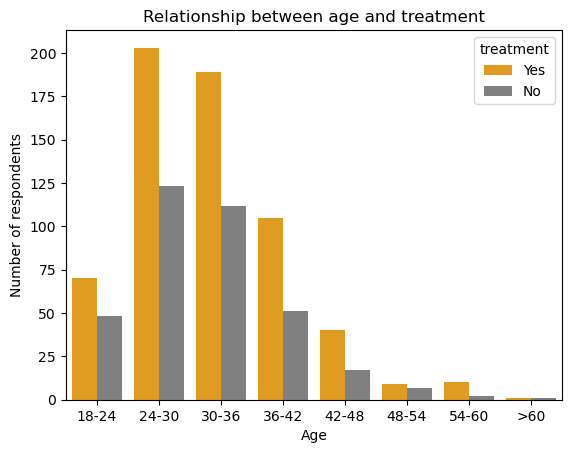

In [84]:
sns.countplot(x='age_group', data = df, hue ='treatment', palette =['orange','gray'])
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title('Relationship between age and treatment')



Text(0, 0.5, 'Age')

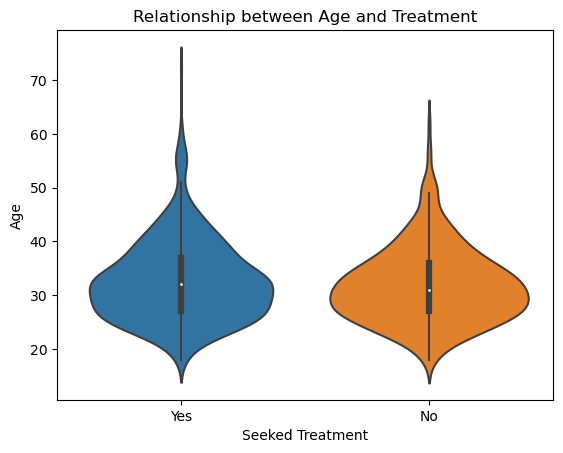

In [86]:
sns.violinplot(x='treatment', y='Age', data=df)
plt.title('Relationship between Age and Treatment');
plt.xlabel('Seeked Treatment')
plt.ylabel('Age')

Text(0.5, 1.0, 'Mental illness interfere with your work?')

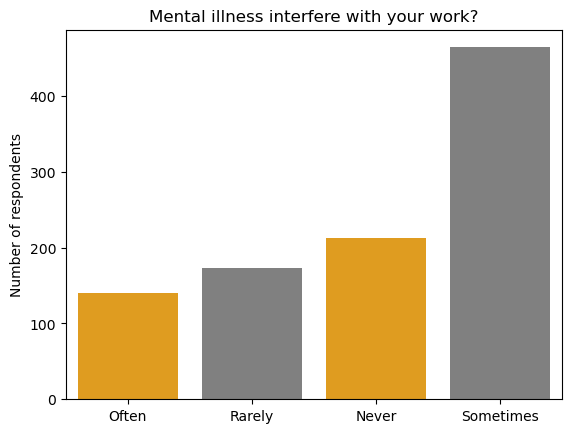

In [87]:
sns.countplot(x='work_interfere',data=df,palette =['orange','gray'])
plt.ylabel('Number of respondents')
plt.xlabel('')
plt.title('Mental illness interfere with your work?')



Text(0.5, 1.0, 'Relationship between work remotely and treatment')

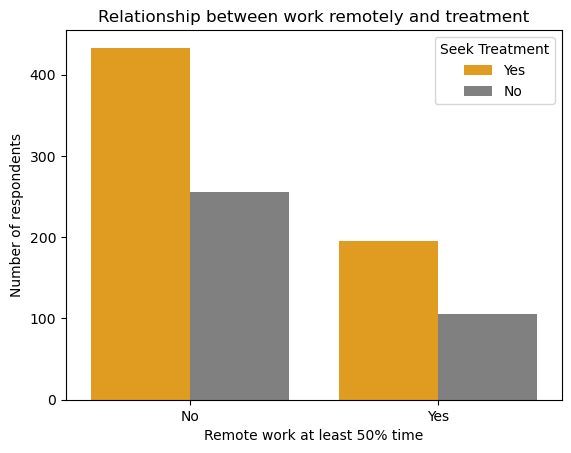

In [92]:
sns.countplot(x='remote_work', data = df, hue = 'treatment', palette =['orange','gray'])
leg = plt.legend(loc='best', title='Seek Treatment')
plt.ylabel('Number of respondents')
plt.xlabel('Remote work at least 50% time')
plt.title('Relationship between work remotely and treatment')

Text(0.5, 1.0, 'Mental health discussion in company wellness program?')

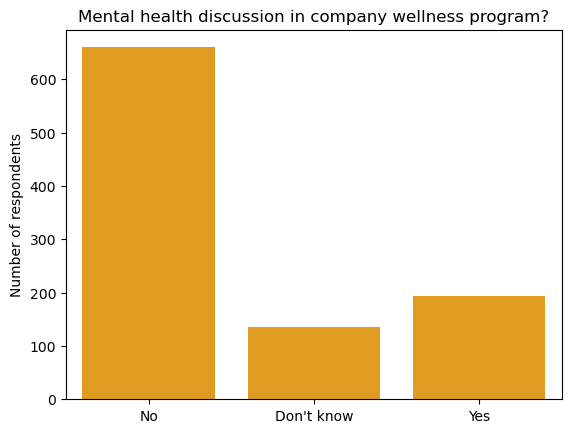

In [95]:
sns.countplot(x='wellness_program', data=df, color ='orange')
plt.ylabel('Number of respondents')
plt.xlabel('')
plt.title('Mental health discussion in company wellness program?')


Text(0.5, 1.0, 'Relationship between Observed negative consequences and Treatment')

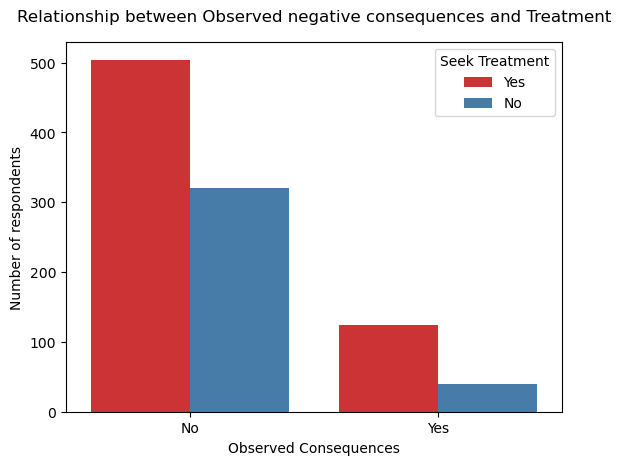

In [99]:
sns.countplot(x='obs_consequence', hue='treatment',  data=df, palette='Set1')
leg = plt.legend(loc='best', title='Seek Treatment')
plt.xlabel('Observed Consequences')
plt.ylabel('Number of respondents');
plt.title('Relationship between Observed negative consequences and Treatment', pad=15)

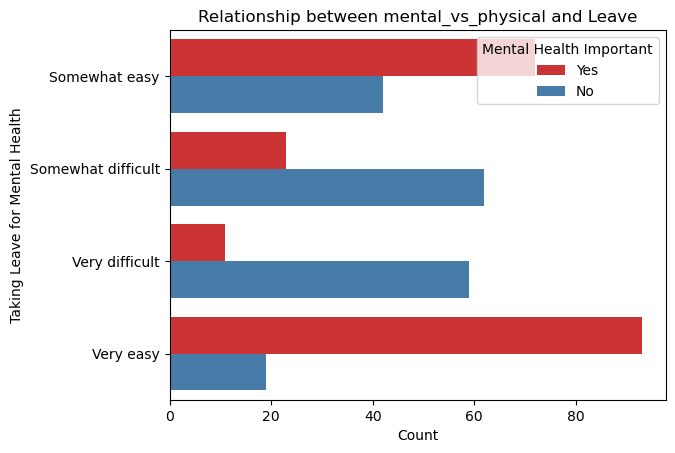

In [112]:
mvp = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['leave']
test = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['mental_vs_physical']

sns.countplot(y=mvp, data=df, hue=test, palette='Set1')

plt.xlabel('Count')
plt.ylabel('Taking Leave for Mental Health')
plt.title('Relationship between mental_vs_physical and Leave')

leg = plt.legend(loc='best', title='Mental Health Important')

In [113]:
df.to_csv('/Users/macbook/Downloads/mentalhealth_python_v1.csv')